### `Import libraries`

In [1]:
import pandas as pd 
import numpy as np 
import plotly.express as px 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder as lb
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.api import OLS
from sklearn.preprocessing import MinMaxScaler
from sklearn.manifold import TSNE
from imblearn.combine import SMOTETomek 
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier



import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)





### `Loading and reading data`

In [2]:
df= pd.read_csv(r'D:\extrnal hard\ITI\case study\EFG Case Study\census_income_original_2.csv')

In [3]:
df.head()

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,income_value
0,1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K,7986
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K,4566
2,3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K,2571
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K,8611
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K,1553


In [4]:
df.shape

(33333, 16)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33333 entries, 0 to 33332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              33333 non-null  int64 
 1   age             33333 non-null  int64 
 2   workclass       33333 non-null  object
 3   education       33333 non-null  object
 4   education.num   33333 non-null  int64 
 5   marital.status  33333 non-null  object
 6   occupation      33333 non-null  object
 7   relationship    33333 non-null  object
 8   race            33333 non-null  object
 9   Gender          33333 non-null  object
 10  capital.gain    33333 non-null  int64 
 11  capital.loss    33333 non-null  int64 
 12  hours.per.week  33333 non-null  int64 
 13  native.country  33333 non-null  object
 14  income          33333 non-null  object
 15  income_value    13190 non-null  object
dtypes: int64(6), object(10)
memory usage: 4.1+ MB


### `inspect the data `

In [6]:
nulls_df = df.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count
15,income_value,20143


In [7]:
## columns which have more than 60% of the data NULL values recommend to be dropped

In [8]:
# percent of null values at income_value
percent_nulls=nulls_df[nulls_df['Nulls_Count'] > 0]['Nulls_Count'].iloc[0]/df.shape[0]
print(f' percent of null values at income_value column is {percent_nulls *100 : 0.4} %')

 percent of null values at income_value column is  60.43 %


In [9]:
# we have strang character at the data [?] it act like nulls

In [10]:
# function to search which coulmn has ? character

def search(df,cols):
    
    for col in cols:
        if df[df[col]=='?'].empty==False:
           print(f'the {col} has ? character in it ')


In [11]:
search(df,list(df.columns))

the workclass has ? character in it 
the occupation has ? character in it 
the native.country has ? character in it 


In [12]:
#search for duplicated values  because it act like noise in the data 
print(f"We have {df.duplicated().sum()} duplicate values") 


We have 304 duplicate values


In [13]:
num_columns=list(set(df.describe().columns)-set(["ID"]))
cat_columns=list(set(df.columns) - set(num_columns)- set(["ID"]))
len(cat_columns),len(num_columns)

(10, 5)

### `data cleaning`

#### `1-dealing with nulls`

In [14]:
#  percent of null values at income_value column is 60.43 % so we will drop the income_value column


In [15]:
df=df.drop(columns=['income_value'])
df.head(5)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K


In [16]:
df.shape

(33333, 15)

In [17]:
# check again for null values 
# percent of null values at income_value
percent_nulls=nulls_df[nulls_df['Nulls_Count'] > 0]['Nulls_Count'].iloc[0]/df.shape[0]
print(f' percent of null values at income_value column is {percent_nulls *100 : 0.4} %')


 percent of null values at income_value column is  60.43 %


In [18]:
nulls_df = df.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count


In [19]:
# there is no null values in data 

#### `2-dealing with missing values and strange characters `

In [20]:
# we have three coulmns has missing value as ? character [workclass,occupation,native.country]
idx1=list(df[df["workclass"]=="?"].index)
print('number of missing values for workclass coulmn = ',len(idx1))

idx2=list(df[df["occupation"]=="?"].index)
print('number of missing values for occupation coulmn = ',len(idx2))

idx3=list(df[df["native.country"]=="?"].index)
print('number of missing values for native.country coulmn = ',len(idx3))



number of missing values for workclass coulmn =  1860
number of missing values for occupation coulmn =  1867
number of missing values for native.country coulmn =  603


In [21]:
df.head()

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,1,90,?,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,3,66,?,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K


In [22]:
# the number of missing values according to number of the data is small we can fill missing values with  the avarage freqqent value at every coulmn 
# but in my opinion it will be like adding un correct data to my data and it will be act as noise so i will dropp the rows has missing values 

In [23]:
idx1=list(df[df["workclass"]=="?"].index)
df=df.drop( idx1,axis=0).reset_index(drop=True)

idx2=list(df[df["occupation"]=="?"].index)
df=df.drop( idx2,axis=0).reset_index(drop=True)

idx3=list(df[df["native.country"]=="?"].index)
df=df.drop( idx3,axis=0).reset_index(drop=True)



In [24]:
df.shape

(30890, 15)

In [25]:
# check again for missing values 
search(df,list(df.columns))

In [26]:
# no missing values found

#### `3-dealing with duplicated `

In [27]:
# i will drop the rows which has duplicated value

In [28]:
df = df.drop_duplicates()


In [29]:
print(f"We have {df.duplicated().sum()} duplicate values")


We have 0 duplicate values


#### `4-check for data types for every column and unique values for categorical  columns`

In [30]:
df.head(5)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,2,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,4,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,5,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K
3,6,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,female,0,3770,45,United-States,<=50K
4,7,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30565 entries, 0 to 30696
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   ID              30565 non-null  int64 
 1   age             30565 non-null  int64 
 2   workclass       30565 non-null  object
 3   education       30565 non-null  object
 4   education.num   30565 non-null  int64 
 5   marital.status  30565 non-null  object
 6   occupation      30565 non-null  object
 7   relationship    30565 non-null  object
 8   race            30565 non-null  object
 9   Gender          30565 non-null  object
 10  capital.gain    30565 non-null  int64 
 11  capital.loss    30565 non-null  int64 
 12  hours.per.week  30565 non-null  int64 
 13  native.country  30565 non-null  object
 14  income          30565 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [32]:
# the data types looks good 

In [33]:
# the ID column order changed because we droped some rows and this col act like an index we can edit it 

In [34]:
df["ID"]=np.arange(df.shape[0])

In [35]:
df.head(5)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,1,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
2,2,41,Private,Some-college,10,Separated,"Prof-,specialty",Own-child,White,Female,0,3900,40,United-States,<=50K
3,3,34,Private,HS-grad,9,Divorced,Other-service,Unmarried,White,female,0,3770,45,United-States,<=50K
4,4,38,Private,10th,6,Separated,Adm-clerical,Unmarried,White,Male,0,3770,40,United-States,<=50K


In [36]:
num_columns=list(set(df.describe().columns)-set(["ID"]))
cat_columns=list(set(df.columns) - set(num_columns)- set(["ID"]))
len(cat_columns),len(num_columns)

(9, 5)

In [37]:
for col in cat_columns:
    y=df[col].unique()
    print(f'the  unique values for column {col }  is  = \n {list(y)}')

the  unique values for column marital.status  is  = 
 ['Widowed', 'Divorced', 'Separated', 'Never-married', 'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse']
the  unique values for column workclass  is  = 
 ['Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc', 'Self-emp-inc', 'Local-gov', 'Without-pay']
the  unique values for column education  is  = 
 ['HS-grad', '7th-8th', 'Some-college', '10th', 'Doctorate', 'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-voc', '1st-4th', '5th-6th', 'Assoc-acdm', '12th', '9th', 'Preschool']
the  unique values for column Gender  is  = 
 ['Female', 'female', 'Male', 'M', 'm', 'malee', 'male', 'f', 'm ']
the  unique values for column occupation  is  = 
 ['Exec-managerial', 'Machine-op-inspct', 'Prof-,specialty', 'Other-service', 'Adm-clerical', 'Prof-specialty', 'Transport-moving', 'Sales', 'Craft-repair', 'Farming-fishing', 'Tech-support', 'Protective-serv', 'Handlers-cleaners', 'Armed-Forces', 'Priv-house-serv']
the  uniq

In [38]:
# we found the column Gender has a lot of notations that indicated the same thing, so we can edit it to Female and Male

In [39]:
df['Gender']= df['Gender'].replace('female','Female')
df['Gender']= df['Gender'].replace('f','Female')
df['Gender']= df['Gender'].replace('M','Male')
df['Gender']= df['Gender'].replace('malee','Male')
df['Gender']= df['Gender'].replace('male','Male')
df['Gender']= df['Gender'].replace('m','Male')
df['Gender']= df['Gender'].replace('m ','Male')



In [40]:
# check for the Gender column
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

### `EDA`

In [41]:
# we will search the relations between the income and every column 

#### `1-Categorical variable analysis`

In [42]:
df2=df.copy()

In [43]:
df2["Count"]=1

In [44]:
d1=df2.groupby(["income","workclass"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d1


,income,workclass,Count
6,<=50K,Without-pay,14
12,>50K,State-gov,354
7,>50K,Federal-gov,372
3,<=50K,Self-emp-inc,477
0,<=50K,Federal-gov,589
8,>50K,Local-gov,627
10,>50K,Self-emp-inc,634
11,>50K,Self-emp-not-inc,746
5,<=50K,State-gov,937
1,<=50K,Local-gov,1470


In [45]:
px.bar(d1,x='workclass',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',width=1000,height=400,title="Income VS workclass ")

In [46]:
# from that we found the most class has highest income is Privat and the lowest class has income is  Without-pay

In [47]:
df.head(2)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income
0,0,82,Private,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
1,1,54,Private,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K


In [48]:
d2=df2.groupby(["income","education"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d2


,income,education,Count
19,>50K,1st-4th,6
20,>50K,5th-6th,12
22,>50K,9th,26
18,>50K,12th,29
21,>50K,7th-8th,35
13,<=50K,Preschool,45
17,>50K,11th,60
16,>50K,10th,63
10,<=50K,Doctorate,96
14,<=50K,Prof-school,137


In [49]:
px.bar(d2,x='education',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',width=1000,height=400,title="Income VS Education ")

In [50]:
#we found that the higest income (>50K) with people who has Bachelors and people with highest income (<50K) who has HS-grade and lowest income with people who has 1st-4th education

In [51]:
d3=df2.groupby(["income","marital.status"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d3

,income,marital.status,Count
8,>50K,Married-AF-spouse,10
1,<=50K,Married-AF-spouse,11
10,>50K,Married-spouse-absent,32
12,>50K,Separated,71
13,>50K,Widowed,87
3,<=50K,Married-spouse-absent,340
7,>50K,Divorced,470
11,>50K,Never-married,493
6,<=50K,Widowed,754
5,<=50K,Separated,879


In [52]:
px.bar(d3,x='marital.status',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',width=1000,height=400,title="Income VS Marital Status ")

In [53]:
# we found the people who are Married-civ-spouse has highest income (>50K) and the people who are never married has highest income(<50K) and people who are Married-AF-spouse has the lowest income

In [54]:
d4=df2.groupby(["income","occupation"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d4

,income,occupation,Count
16,>50K,Armed-Forces,1
23,>50K,Priv-house-serv,1
1,<=50K,Armed-Forces,8
20,>50K,Handlers-cleaners,86
19,>50K,Farming-fishing,120
22,>50K,Other-service,135
8,<=50K,Priv-house-serv,142
26,>50K,Protective-serv,213
21,>50K,Machine-op-inspct,247
28,>50K,Tech-support,286


In [55]:
px.bar(d4,x='occupation',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',width=1000,height=400,title="Income VS Occupation ")

In [56]:
# we found the highest occupation income is the people who are Exec-managerial they earn (>50K) and highest people who earn (<=50K ) are the Adm-clerical
# and the lowest income for the people who are in Armed -Forces

In [57]:
d5=df2.groupby(["income","relationship"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d5

,income,relationship,Count
8,>50K,Other-relative,39
9,>50K,Own-child,67
10,>50K,Unmarried,224
5,<=50K,Wife,719
11,>50K,Wife,724
2,<=50K,Other-relative,860
7,>50K,Not-in-family,860
4,<=50K,Unmarried,3008
3,<=50K,Own-child,4416
6,>50K,Husband,5818


In [58]:
px.bar(d5,x='relationship',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',width=1000,height=400,title="Income VS Relationship ")

In [59]:
#we found that the people who are Husband has the highest income (>50K) and the people who are Not-in-family has the highest income(<50K) and the people who are in Other-relative 
#has the lowest income

In [60]:
d6=df2.groupby(["income","race"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d6


,income,race,Count
8,>50K,Other,21
5,>50K,Amer-Indian-Eskimo,35
3,<=50K,Other,212
0,<=50K,Amer-Indian-Eskimo,253
6,>50K,Asian-Pac-Islander,254
7,>50K,Black,373
1,<=50K,Asian-Pac-Islander,654
2,<=50K,Black,2465
9,>50K,White,7049
4,<=50K,White,19249


In [61]:
px.bar(d6,x='race',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',width=1000,height=400,title="Income VS Race ")

In [62]:
# as we see the white race has the most income in (>50K) and (<50K) 

In [63]:
d7=df2.groupby(["income","Gender"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d7


# Gender

,income,Gender,Count
2,>50K,Female,1163
3,>50K,Male,6569
0,<=50K,Female,8724
1,<=50K,Male,14109


In [64]:
d8=d7.groupby('Gender',as_index=False).sum()
d8

,Gender,Count
0,Female,9887
1,Male,20678


In [65]:
fig=px.pie(d8


,values='Count',names='Gender',hole=.5,hover_data=['Count'],width=1000,height=400)
fig.update_traces(textposition='outside', textinfo='percent+label+value',pull=[0, 0.2, 0,0,0,0,0])
fig.update_layout(
    title_text="Female VS Males",margin = dict(t=2, l=0, r=0, b=0),
                 )
fig.show()

In [66]:
# in the data number of males is greater than female

In [67]:
px.bar(d7,x='Gender',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',width=1000,height=400,title="Income VS Gender ")

In [68]:
#males have the highest income at (>50K) and (<50K) 

In [69]:
d9=df2.groupby(["income","native.country"],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
d9



,income,native.country,Count
55,>50K,Honduras,2
14,<=50K,Holand-Netherlands,2
46,>50K,Dominican-Republic,2
66,>50K,Nicaragua,2
67,>50K,Peru,2
...,...,...,...
32,<=50K,Puerto-Rico,98
29,<=50K,Philippines,131
25,<=50K,Mexico,580
77,>50K,United-States,7209


In [70]:
d10=d9[d9["native.country"] != 'United-States']
d10

,income,native.country,Count
55,>50K,Honduras,2
14,<=50K,Holand-Netherlands,2
46,>50K,Dominican-Republic,2
66,>50K,Nicaragua,2
67,>50K,Peru,2
...,...,...,...
10,<=50K,Germany,84
7,<=50K,El-Salvador,91
32,<=50K,Puerto-Rico,98
29,<=50K,Philippines,131


In [71]:
px.bar(d10,x='native.country',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',title="Income VS Native Country")

In [72]:
# there is no comparison with the people who are native country is usa to others so i removed it and now Mexico is the highest Native Country has income (<=50K) 
# and Philippines has the highest income at (>50K) and lowet native country is Honduras

In [73]:
d11=d9[d9["native.country"] == 'United-States']
d11

,income,native.country,Count
77,>50K,United-States,7209
38,<=50K,United-States,20669


In [74]:
px.bar(d11,x='native.country',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',title=" Americans Income ",width=1000,height=400)

In [75]:
# about 21K people earn (<=50K) and 7.2K people earn >50K 

In [76]:
df3=df2.copy()

In [77]:
df3.sort_values(by="age",inplace=True)


In [78]:
df3['cluster'] = pd.cut(df.age, 8, labels=range(1, 9))
df3.head(5)

,ID,age,workclass,education,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,Count,cluster
10474,10474,17,Private,11th,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,1,1
23954,23954,17,Private,10th,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,1,1
25690,25690,17,Private,10th,6,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K,1,1
25692,25692,17,Private,11th,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,17,United-States,<=50K,1,1
27955,27955,17,Private,11th,7,Never-married,Other-service,Other-relative,White,Female,0,0,20,United-States,<=50K,1,1


In [79]:
for i in range(8):
    min=df3[df3['cluster'] ==i+1]["age"].min()   
    max=df3[df3['cluster'] ==i+1]["age"].max() 
    print(f'for cluster {i+1} min = {min} and max = {max}')


for cluster 1 min = 17 and max = 26
for cluster 2 min = 27 and max = 35
for cluster 3 min = 36 and max = 44
for cluster 4 min = 45 and max = 53
for cluster 5 min = 54 and max = 62
for cluster 6 min = 63 and max = 71
for cluster 7 min = 72 and max = 80
for cluster 8 min = 81 and max = 90


In [80]:
df3["cluster"]=df3["cluster"].astype("object")
df3['cluster']= df3['cluster'].replace(1,'17-26')
df3['cluster']= df3['cluster'].replace(2,'27-35')
df3['cluster']= df3['cluster'].replace(3,'36-44')
df3['cluster']= df3['cluster'].replace(4,'45-53')
df3['cluster']= df3['cluster'].replace(5,'54-62')
df3['cluster']= df3['cluster'].replace(6,'63-71')
df3['cluster']= df3['cluster'].replace(7,'72-80')
df3['cluster']= df3['cluster'].replace(8,'81-90')


In [81]:
df3["cluster"].unique()

array(['17-26', '27-35', '36-44', '45-53', '54-62', '63-71', '72-80',
       '81-90'], dtype=object)

In [82]:
dd=df3.groupby(["income","cluster",],as_index=False).sum().drop(columns=['ID','age','education.num','capital.gain','capital.loss','hours.per.week']).sort_values(by="Count")
dd



,income,cluster,Count
15,>50K,81-90,14
14,>50K,72-80,57
7,<=50K,81-90,64
8,>50K,17-26,177
6,<=50K,72-80,208
13,>50K,63-71,268
5,<=50K,63-71,761
12,>50K,54-62,1044
9,>50K,27-35,1499
4,<=50K,54-62,1892


In [83]:

px.bar(dd,x='cluster',y=['Count'] ,hover_data=["income"],color="income",barmode='group',text_auto='.2s',title=" Age group Vs Income ",width=1000,height=400)

In [84]:
# we can see that the ages between {36 to 44} has the high-income group (>50K)  and the ages between 17 to 26 has the highest at  the low-income groups (<= 50K) 
# and the ages between 81 to 90 has the lowest income

#### `2-Numerical variables analysis`

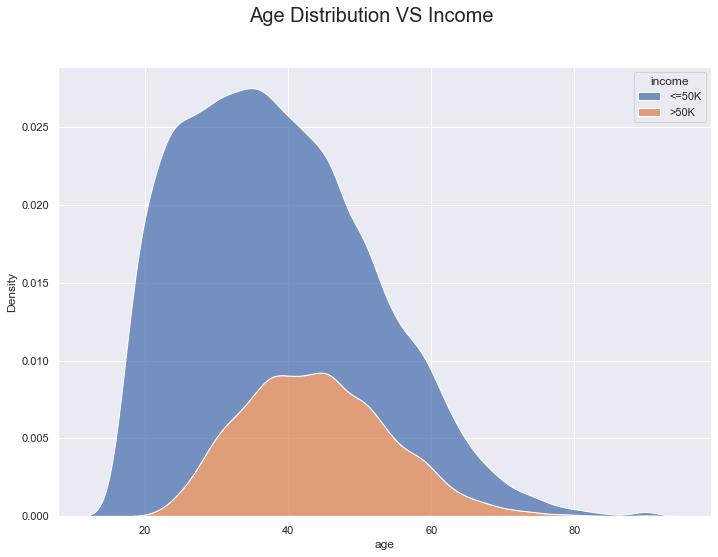

In [85]:
sns.set_theme()
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Age Distribution VS Income ', fontsize=20)

sns.kdeplot(ax=ax,data=df, x="age", hue="income", multiple="stack",);


In [86]:
# we can see that the distribution of the variable age is right-skewed , especially in the low-income groups (<= 50K)
# we can also see that the median age of high-income group (>50K)is higher, which implies the older generation prossess more wealth than the young.

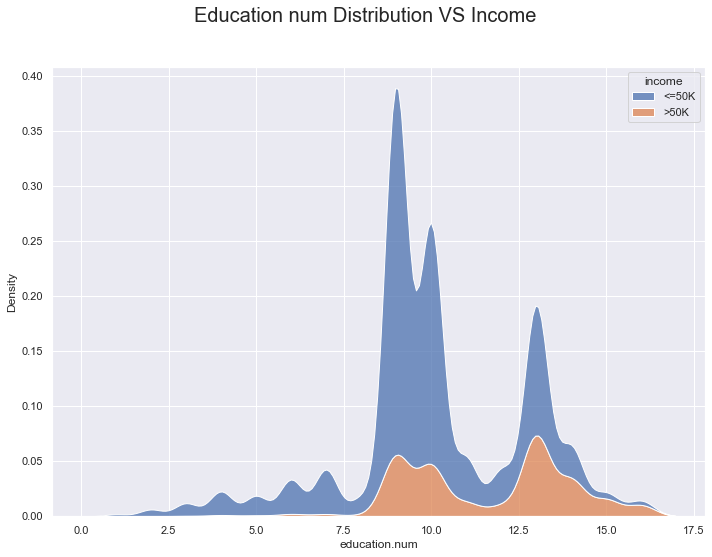

In [87]:
sns.set_theme()
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Education num Distribution VS Income ', fontsize=20)
sns.kdeplot(ax=ax,data=df, x="education.num", hue="income", multiple="stack");

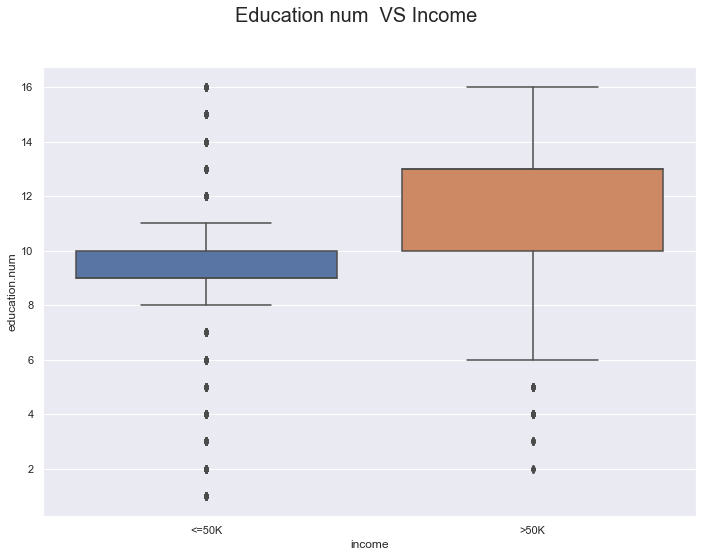

In [88]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Education num  VS Income ', fontsize=20)
sns.boxplot(ax=ax,x="income",y="education.num" ,data=df);

In [89]:
# high income groups have more years of eduction

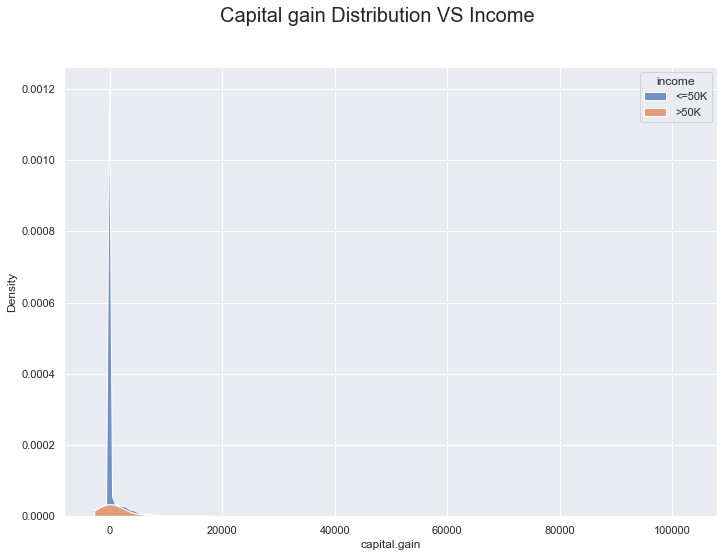

In [90]:
sns.set_theme()
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Capital gain Distribution VS Income ', fontsize=20)
sns.kdeplot(ax=ax,data=df, x="capital.gain", hue="income", multiple="stack");

In [91]:
# there is a big difference between the two groups (>50K) and (<=50K) and all numbers collected close to zero may be there is outliers we can chick with box plot 

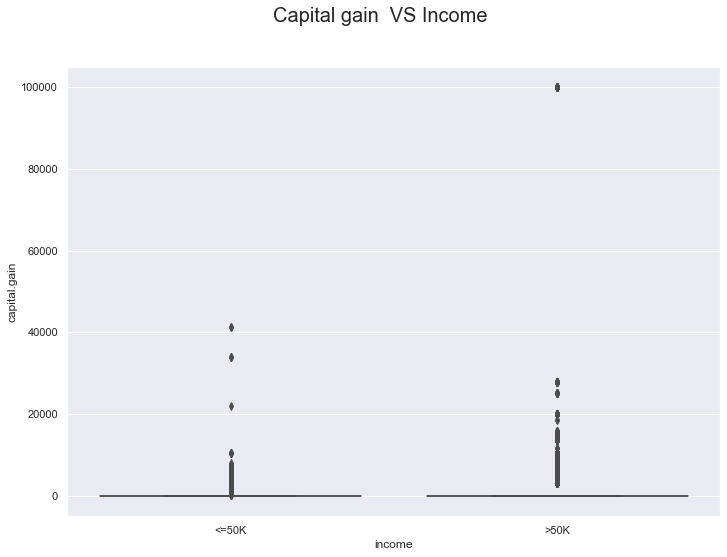

In [92]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Capital gain  VS Income ', fontsize=20)
sns.boxplot(ax=ax,x="income",y="capital.gain" ,data=df);

In [93]:
# there are outliers as we excpected 

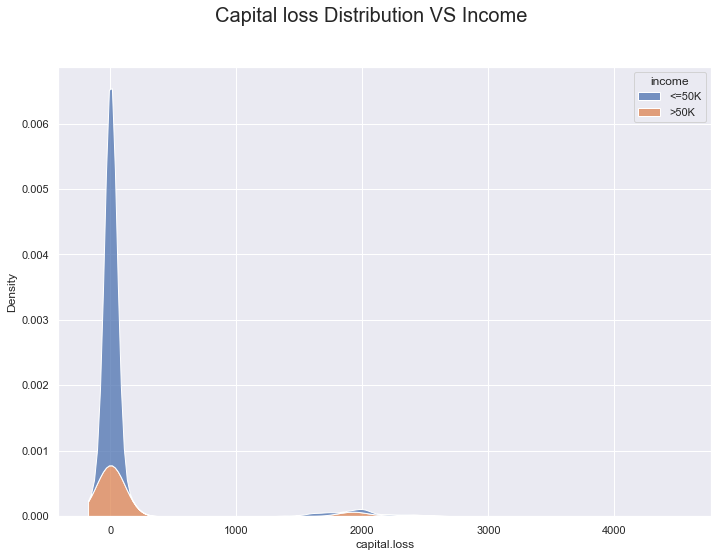

In [94]:
sns.set_theme()
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Capital loss Distribution VS Income ', fontsize=20)
sns.kdeplot(ax=ax,data=df, x="capital.loss", hue="income", multiple="stack");

In [95]:
# it look like the Capital gain but it peaked at value aprox 2000 we can check the boxplot too 

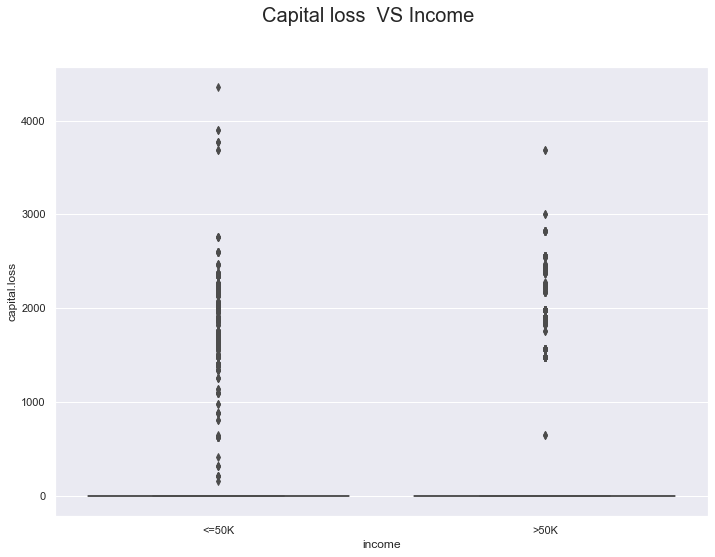

In [96]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Capital loss  VS Income ', fontsize=20)
sns.boxplot(ax=ax,x="income",y="capital.loss" ,data=df);

In [97]:
# there are outliers as too we will deal with that later


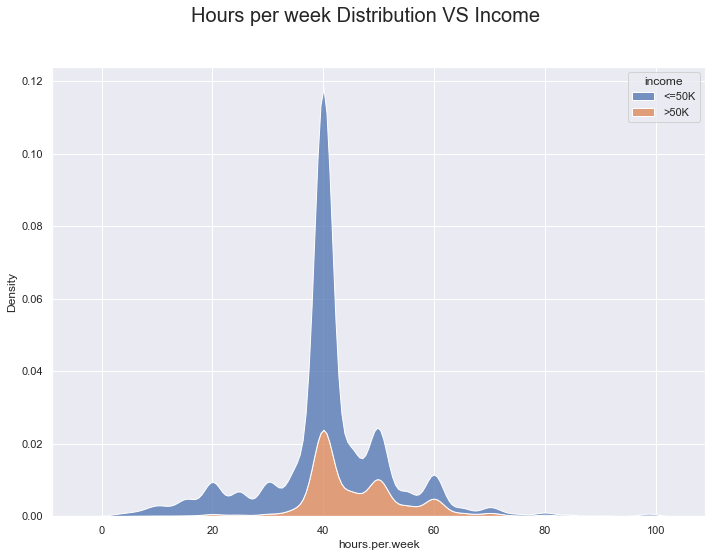

In [98]:
sns.set_theme()
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
fig.suptitle('Hours per week Distribution VS Income ', fontsize=20)
sns.kdeplot(ax=ax,data=df, x="hours.per.week", hue="income", multiple="stack");


In [99]:
# the avarge numbers of hours at the two groups are aprox similar at 40 hour but the number of lowest groupe (<=50K) is more than the higest groupe (>=50K)

### `Feature Engineering`


In [100]:
# we created a new column called cluster when we was making plots

In [101]:
## the column education is like the education.num column we can keep one of them i will drob education column and Count column
df3.drop(columns=["education","Count"],inplace=True)
df3.head(2)


,ID,age,workclass,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
10474,10474,17,Private,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,17-26
23954,23954,17,Private,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,17-26


In [104]:
df3.reset_index(drop=True,inplace=True)
df3["ID"]=np.arange(df3.shape[0])
df3.head(5)

,ID,age,workclass,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,0,17,Private,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,17-26
1,1,17,Private,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,17-26
2,2,17,Private,6,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K,17-26
3,3,17,Private,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,17,United-States,<=50K,17-26
4,4,17,Private,7,Never-married,Other-service,Other-relative,White,Female,0,0,20,United-States,<=50K,17-26


### `Split Data`

In [105]:
X_train,X_test = train_test_split(df3, test_size=0.2, random_state=2022)

In [106]:
num_columns=list(set(X_train.describe().columns)-set(["ID"]))
cat_columns=list(set(X_train.columns) - set(num_columns)- set(["ID"]))
len(cat_columns),len(num_columns)

(9, 5)

### `check for redundance values in cols`

In [107]:
th_count=X_train.shape[0]*0.8
columns_to_drop=[]
for col in num_columns :
    if X_train.groupby(by=col)['ID'].count().reset_index().sort_values(by=['ID'],ascending=False).iloc[0,1] >th_count:
            columns_to_drop.append(col)
            print(f"{col} is redundanc")

capital.loss is redundanc
capital.gain is redundanc


In [108]:
# capital.loss and capital.gain is redundanc because it has alot of zeros in it but i will keep it for now

In [109]:
num_columns=list(set(X_train.describe().columns)-set(["ID"]))
cat_columns=list(set(X_train.columns) - set(num_columns)- set(["ID"]))
len(cat_columns),len(num_columns)


(9, 5)

In [110]:
X_train.shape,X_test.shape

((24452, 15), (6113, 15))

### `dealing with skewness`

In [111]:
m=X_train[num_columns].mean(axis=0)
std=X_train[num_columns].std(axis=0)
skewed_cols = []

sk_coff=((X_train[num_columns]-m)**3).sum(axis=0)/((X_train.shape[0]-1)* std**3)

i=0
for col in num_columns:
    if abs(sk_coff[i]>1):
        X_train[col]=np.log(np.abs(X_train[col]+1))
        X_test[col]=np.log(np.abs(X_test[col]+1))
        skewed_cols.append(col)
        print(f"{col} : removed skewness")
    i+=1

capital.loss : removed skewness
capital.gain : removed skewness


In [112]:
sk_coff

capital.loss       3.904165
hours.per.week     0.338685
education.num     -0.301521
age                0.519697
capital.gain      12.276811
dtype: float64

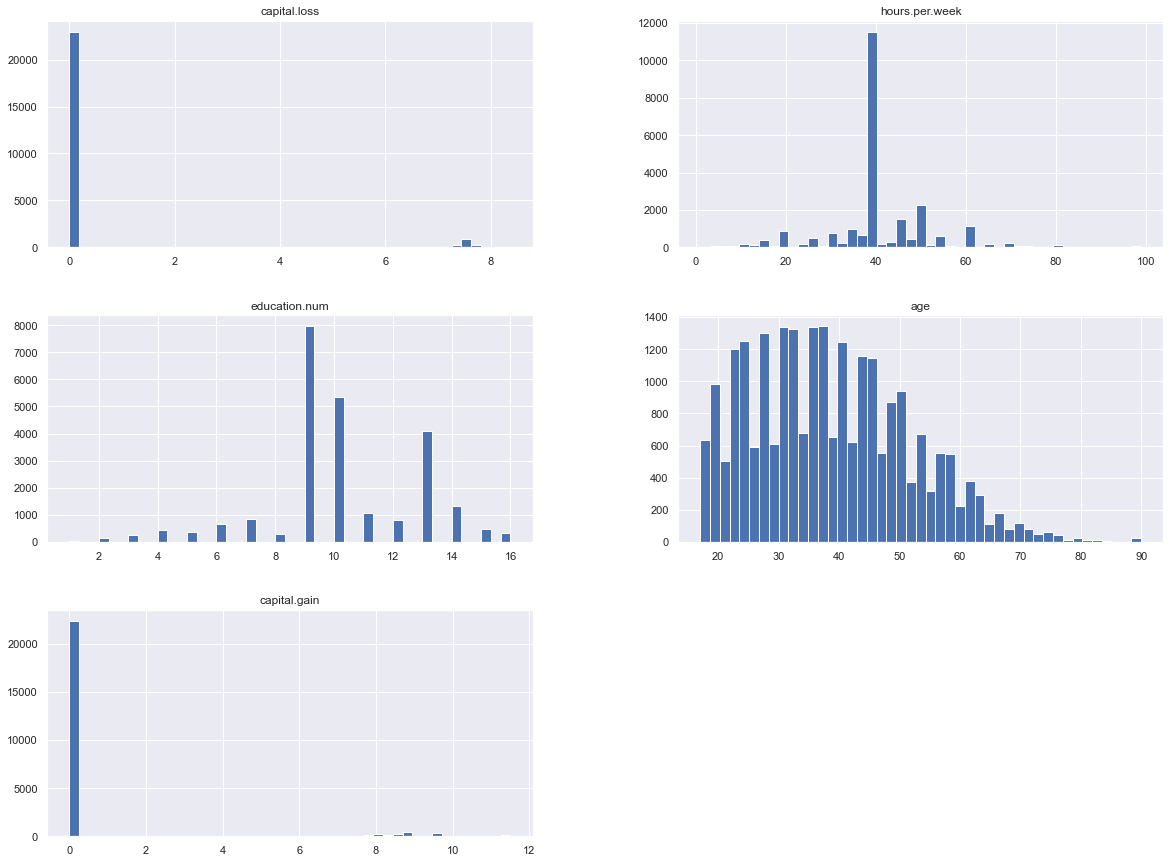

In [113]:
X_train[num_columns].hist(bins=45,figsize=(20,15));

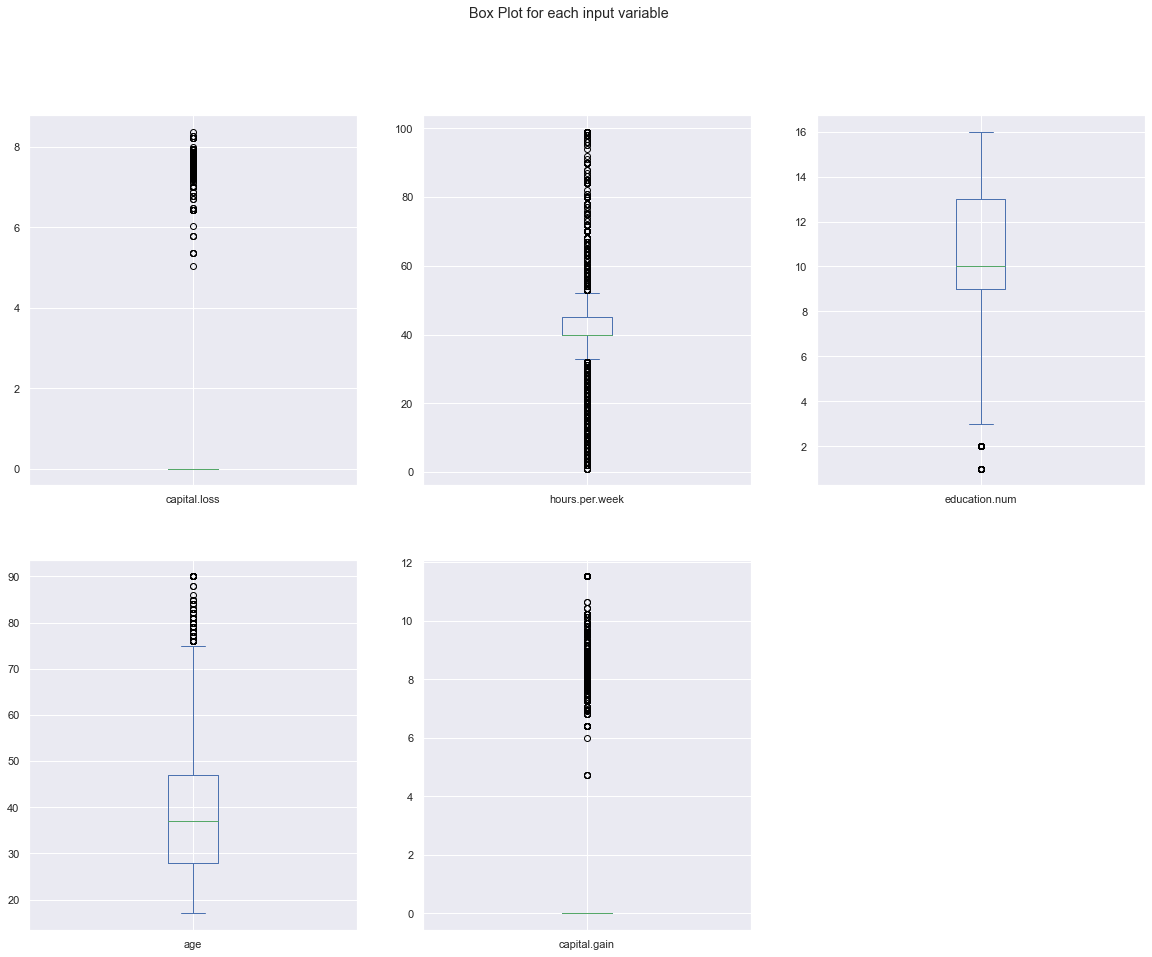

In [114]:
#Box Plot for each input variable
X_train[num_columns].plot(kind="box",subplots=True,figsize=(20,15),layout=(2,3),title="Box Plot for each input variable");

### `Dealing with outliers`

In [115]:
df3.drop(columns="ID").describe().T

,count,mean,std,min,25%,50%,75%,max
age,30565.0,38.513005,13.147831,17.0,28.0,37.0,47.0,90.0
education.num,30565.0,10.136790,2.557717,1.0,9.0,10.0,13.0,16.0
capital.gain,30565.0,1077.609717,7358.410863,0.0,0.0,0.0,0.0,99999.0
capital.loss,30565.0,115.956519,468.075999,0.0,0.0,0.0,0.0,4356.0
hours.per.week,30565.0,40.976542,12.007523,1.0,40.0,40.0,45.0,99.0


In [116]:
# we have outliers at capital.gain and capital.loss	 


In [117]:
(X_train["capital.gain"][X_train["capital.gain"]==0])=np.sqrt(X_train["capital.gain"][X_train["capital.gain"]>0].min())
(X_test["capital.gain"][X_test["capital.gain"]==0])=np.sqrt(X_test["capital.gain"][X_test["capital.gain"]>0].min())

(X_train["capital.loss"][X_train["capital.loss"]==0])=np.sqrt(X_train["capital.loss"][X_train["capital.loss"]>0].min())
(X_test["capital.loss"][X_test["capital.loss"]==0])=np.sqrt(X_test["capital.loss"][X_test["capital.loss"]>0].min())


In [118]:
#  and hours.per.week did not make sense as max = 99 so i clamped it to 90 

In [119]:
(X_train["hours.per.week"][X_train["hours.per.week"]>90])= 90
(X_test["hours.per.week"][X_test["hours.per.week"]>90])=90

In [120]:
X_train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,24452.0,15264.612015,8821.276351,0.000000,7625.750000,15295.500000,22887.250000,30563.000000
age,24452.0,38.481310,13.125959,17.000000,28.000000,37.000000,47.000000,90.000000
education.num,24452.0,10.133731,2.562496,1.000000,9.000000,10.000000,13.000000,16.000000
capital.gain,24452.0,2.731809,1.859271,2.178287,2.178287,2.178287,2.178287,11.512925
capital.loss,24452.0,2.568883,1.266596,2.247188,2.247188,2.247188,2.247188,8.379539
hours.per.week,24452.0,40.948634,11.855771,1.000000,40.000000,40.000000,45.000000,90.000000


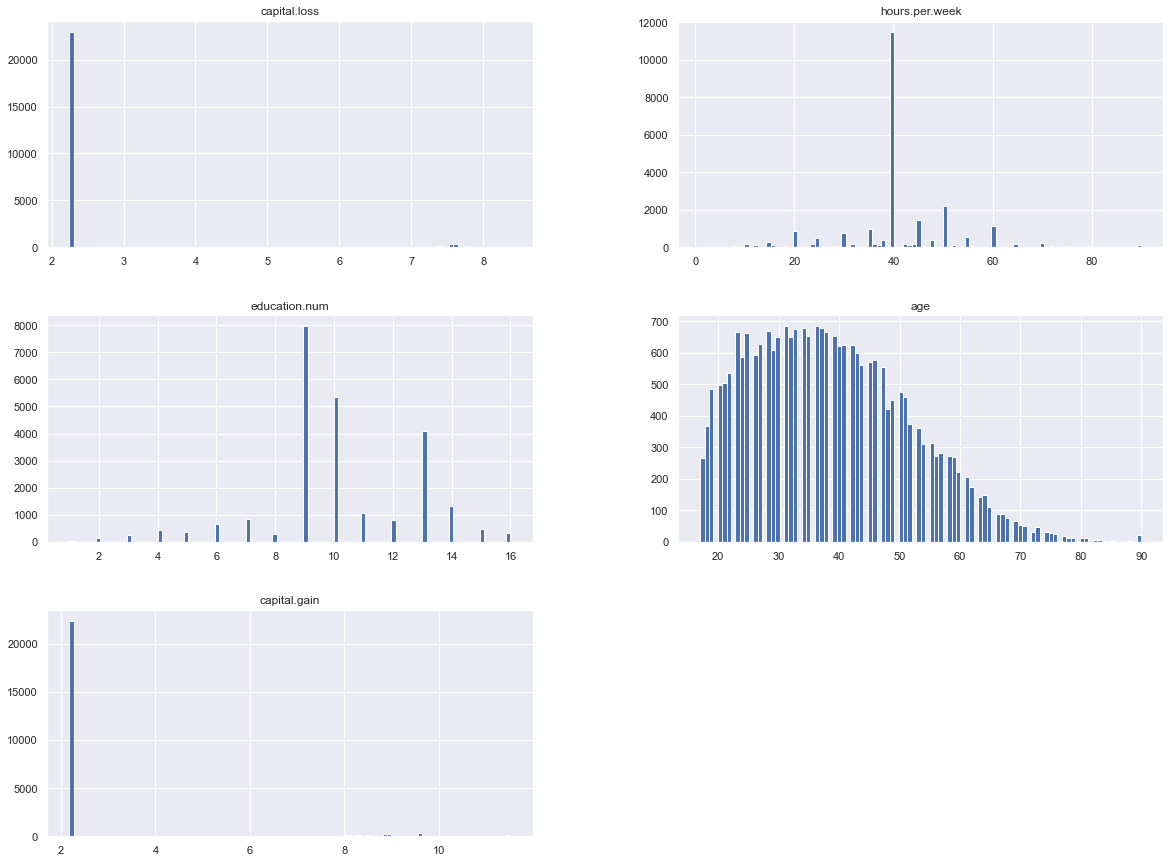

In [121]:
# check for the dist and outliers
X_train[num_columns].hist(bins=100,figsize=(20,15));

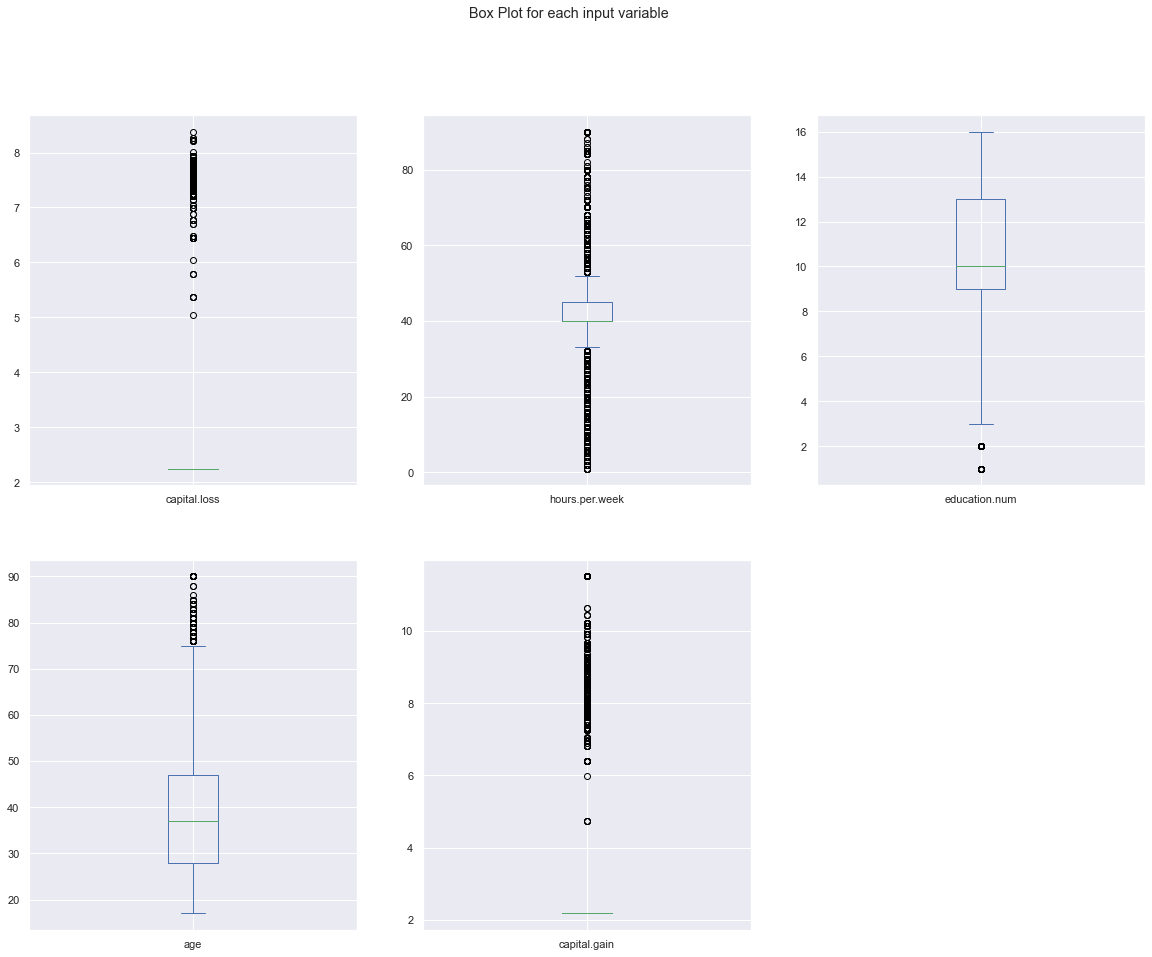

In [122]:
#Box Plot for each input variable
X_train[num_columns].plot(kind="box",subplots=True,figsize=(20,15),layout=(2,3),title="Box Plot for each input variable");

In [123]:
len(X_train["hours.per.week"][X_train["hours.per.week"]>90])

0

### `Scaling `

In [124]:
""" Testing the normally distributed features using Shapiro-Wilk test
 the null hypothesis here is that the data follows a normal distribution
 we reject the null hypothesis (aka: data is not normally distributed) if the p-value is less than alpha (typically 5%)
 and we fail to reject the null hypothesis (aka: data is normally distributes) if the p-value is greater than alpha """
feats_std_scale = []
feats_min_max_scale = []
sample_data  = X_train.sample(replace = False, n= 500)

from scipy.stats import shapiro
for col in num_columns:
    stat, p = shapiro(sample_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.322, p=0.00000000
capital.loss does not look Gaussian (reject H0)
W_Statistic=0.880, p=0.00000000
hours.per.week does not look Gaussian (reject H0)
W_Statistic=0.921, p=0.00000000
education.num does not look Gaussian (reject H0)
W_Statistic=0.967, p=0.00000000
age does not look Gaussian (reject H0)
W_Statistic=0.348, p=0.00000000
capital.gain does not look Gaussian (reject H0)


### `Encoding`

In [125]:
df3.head()

,ID,age,workclass,education.num,marital.status,occupation,relationship,race,Gender,capital.gain,capital.loss,hours.per.week,native.country,income,cluster
0,0,17,Private,7,Never-married,Sales,Own-child,White,Female,0,0,20,United-States,<=50K,17-26
1,1,17,Private,6,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,20,United-States,<=50K,17-26
2,2,17,Private,6,Never-married,Sales,Own-child,White,Female,0,0,12,United-States,<=50K,17-26
3,3,17,Private,7,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,17,United-States,<=50K,17-26
4,4,17,Private,7,Never-married,Other-service,Other-relative,White,Female,0,0,20,United-States,<=50K,17-26


In [126]:
nominal_cats=["native.country","race","workclass","relationship","Gender","marital.status","occupation",'cluster']
ordinal_cats=["income"]

In [127]:
index_=list(X_test[X_test["native.country"]=='Holand-Netherlands'].index)
X_test=X_test.drop( index_,axis=0)

In [128]:
nominal_train_data=pd.get_dummies(X_train[nominal_cats],drop_first=True)
nominal_test_data=pd.get_dummies(X_test[nominal_cats],drop_first=True)

In [129]:
for col in ordinal_cats:
    encoder = lb().fit(X_train[col])
    X_train[col] = encoder.transform(X_train[col])
    X_test[col] = encoder.transform(X_test[col])


In [130]:
num_columns=list(set(X_train.describe().columns)-set(["ID"]))


In [131]:
X_train[num_columns]


,capital.loss,hours.per.week,education.num,age,capital.gain,income
5641,2.247188,50,13,25,2.178287,0
22351,2.247188,60,15,46,11.512925,1
26723,2.247188,40,3,55,2.178287,0
658,2.247188,20,9,18,2.178287,0
15068,2.247188,60,13,37,2.178287,0
...,...,...,...,...,...,...
14001,2.247188,45,10,36,2.178287,0
4720,2.247188,20,10,24,2.178287,0
16557,2.247188,40,9,39,2.178287,0
1244,2.247188,50,12,19,2.178287,0


In [132]:
X_final_test=pd.concat([nominal_test_data,X_test[num_columns]],axis=1)
X_final_train=pd.concat([nominal_train_data,X_train[num_columns]],axis=1)

In [133]:
X_final_train.shape,X_final_test.shape

((24452, 88), (6111, 88))

In [134]:
X_final_train.head(2)

,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,Gender_Male,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,"occupation_Prof-,specialty",occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,cluster_27-35,cluster_36-44,cluster_45-53,cluster_54-62,cluster_63-71,cluster_72-80,cluster_81-90,capital.loss,hours.per.week,education.num,age,capital.gain,income
5641,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.247188,50,13,25,2.178287,0
22351,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,2.247188,60,15,46,11.512925,1


In [135]:
X_final_test.head(2)

,native.country_Canada,native.country_China,native.country_Columbia,native.country_Cuba,native.country_Dominican-Republic,native.country_Ecuador,native.country_El-Salvador,native.country_England,native.country_France,native.country_Germany,native.country_Greece,native.country_Guatemala,native.country_Haiti,native.country_Honduras,native.country_Hong,native.country_Hungary,native.country_India,native.country_Iran,native.country_Ireland,native.country_Italy,native.country_Jamaica,native.country_Japan,native.country_Laos,native.country_Mexico,native.country_Nicaragua,native.country_Outlying-US(Guam-USVI-etc),native.country_Peru,native.country_Philippines,native.country_Poland,native.country_Portugal,native.country_Puerto-Rico,native.country_Scotland,native.country_South,native.country_Taiwan,native.country_Thailand,native.country_Trinadad&Tobago,native.country_United-States,native.country_Vietnam,native.country_Yugoslavia,race_Asian-Pac-Islander,race_Black,race_Other,race_White,workclass_Local-gov,workclass_Private,workclass_Self-emp-inc,workclass_Self-emp-not-inc,workclass_State-gov,workclass_Without-pay,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,Gender_Male,marital.status_Married-AF-spouse,marital.status_Married-civ-spouse,marital.status_Married-spouse-absent,marital.status_Never-married,marital.status_Separated,marital.status_Widowed,occupation_Armed-Forces,occupation_Craft-repair,occupation_Exec-managerial,occupation_Farming-fishing,occupation_Handlers-cleaners,occupation_Machine-op-inspct,occupation_Other-service,occupation_Priv-house-serv,"occupation_Prof-,specialty",occupation_Prof-specialty,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,cluster_27-35,cluster_36-44,cluster_45-53,cluster_54-62,cluster_63-71,cluster_72-80,cluster_81-90,capital.loss,hours.per.week,education.num,age,capital.gain,income
2739,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2.537588,12,11,22,2.178287,0
1229,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,2.537588,25,10,19,2.178287,0


In [136]:
num_columns=list(set(X_final_train.describe().columns)-set(["ID"]))


In [137]:
# num_columns

### ` subset selection `

In [138]:
num=['hours.per.week',
 'age',
 'education.num',
 'capital.gain',
 'capital.loss'
 ]
num

['hours.per.week', 'age', 'education.num', 'capital.gain', 'capital.loss']

In [139]:
feats_high_vif_to_be_dropped = []
cleaned_df_from_multi_coll = X_final_train[num]
num_cols_removed = 0

for origin_df_feat_index in range(len(X_final_train[num].columns)):
    
    num_cols_removed = X_final_train[num].shape[1] - cleaned_df_from_multi_coll.shape[1]
    cleaned_df_feat_index = origin_df_feat_index - num_cols_removed
    VIF_FEAT = variance_inflation_factor(cleaned_df_from_multi_coll.values, cleaned_df_feat_index)
    
    if VIF_FEAT > 20:

        feats_high_vif_to_be_dropped.append(cleaned_df_from_multi_coll.columns[cleaned_df_feat_index])
        cleaned_df_from_multi_coll = cleaned_df_from_multi_coll.drop(columns = [cleaned_df_from_multi_coll.columns[cleaned_df_feat_index]])

In [140]:
feats_high_vif_to_be_dropped

[]

In [141]:
y_train = X_final_train[["income"]]
X_train = X_final_train[list(set(X_final_train.columns) - set(['income']))]

y_test = X_final_test[["income"]]
X_test = X_final_test[list(set(X_final_test.columns) - set(['income']))]

In [142]:
y_train.shape,X_train.shape,y_test.shape,X_test.shape

((24452, 1), (24452, 87), (6111, 1), (6111, 87))

In [143]:
significant_feats_df = X_train
LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})
insignificant_feats_ls = []

while LRresult['P>|t|'].max() > 0.05:
    insignificant_feat = LRresult[LRresult['P>|t|'] == LRresult['P>|t|'].max()][['feature_name']].values[0, 0]
    insignificant_feats_ls.append(insignificant_feat)
    significant_feats_df = significant_feats_df.drop(columns = [insignificant_feat])
    LRresult = (OLS(y_train,significant_feats_df).fit().summary2().tables[1]).reset_index().rename(columns = {'index' : 'feature_name'})

In [144]:
insignificant_feats_ls

['race_Other',
 'workclass_Self-emp-inc',
 'race_Asian-Pac-Islander',
 'race_Black',
 'occupation_Priv-house-serv',
 'occupation_Armed-Forces',
 'cluster_81-90',
 'occupation_Other-service',
 'occupation_Craft-repair',
 'marital.status_Separated',
 'age',
 'cluster_72-80',
 'marital.status_Never-married',
 'marital.status_Married-spouse-absent']

In [145]:
y_train.shape,X_train.shape,y_test.shape,X_test.shape

((24452, 1), (24452, 87), (6111, 1), (6111, 87))

In [146]:
X_train=X_train.drop(columns =insignificant_feats_ls)

X_test=X_test.drop(columns =insignificant_feats_ls)


In [147]:
y_train.shape,X_train.shape,y_test.shape,X_test.shape

((24452, 1), (24452, 73), (6111, 1), (6111, 73))

### `final scaling`

In [148]:
# we have alot of catigorical features  and some features have outliers it will be good to use Tree based model which scaling did not affect 

In [149]:
# scaler = MinMaxScaler()
# scaler.fit(X_final_train)
# X_final_train=scaler.transform(X_final_train)
# X_final_test=scaler.transform(X_final_test)

### `dealing with imbalane`

In [151]:
y_train["income"].value_counts()

0    18229
1     6223
Name: income, dtype: int64

In [152]:
# befor doing over sampling or under sampling we can see the data as cluster problem to know is the data can easily to be separated

In [173]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='pca').fit_transform(X_train)

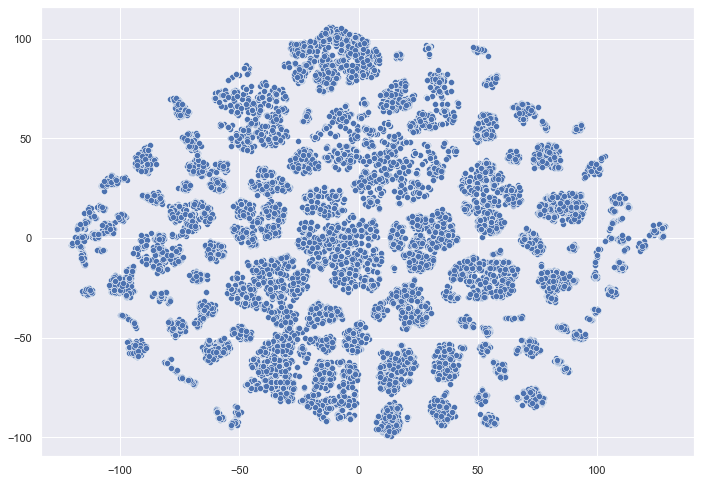

In [174]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x=X_embedded[:,0],y=X_embedded[:,1]);

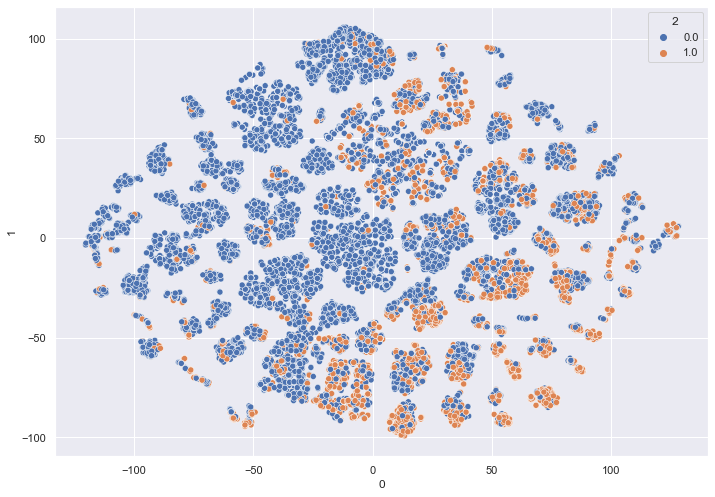

In [175]:
pred_gm=y_train.values.reshape((-1,1))
new_gm=np.concatenate((X_embedded, pred_gm),axis=1)
new_gm=pd.DataFrame(new_gm)
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x=0,y=1, hue =2,data=new_gm);

In [156]:
# # we can not separate the data easily we can doing over sampling or using the class weight parameter at RandomForestClassifier and i prefer using class weight 

### `Modeling`

In [169]:
scores=[]
n_estimators=[5,10,20,30]
samples=[1000,1500,2000,2500,3000,3500]
for n in n_estimators:
    for s in samples:

        model_tree = RandomForestClassifier(max_depth=9,random_state=2022,class_weight={0:2,1:3},min_samples_split=4 ,   
        min_samples_leaf=1 ,max_features=16,n_estimators=n,bootstrap = True,max_samples=s).fit(X_train, y_train)
        y_pred_tree = model_tree.predict(X_test)
        score=f1_score(y_test,y_pred_tree,average='micro')
        scores.append([score,n,s])
        print(f"the f1_score is  : {score } at  n_estimators = {n} and max_samples = {s} ")



the f1_score is  : 0.8345606283750614 at  n_estimators = 5 and max_samples = 1000 
the f1_score is  : 0.8371788577974145 at  n_estimators = 5 and max_samples = 1500 
the f1_score is  : 0.8414334806087383 at  n_estimators = 5 and max_samples = 2000 
the f1_score is  : 0.8448699067255769 at  n_estimators = 5 and max_samples = 2500 
the f1_score is  : 0.8402880052364589 at  n_estimators = 5 and max_samples = 3000 
the f1_score is  : 0.8465063001145475 at  n_estimators = 5 and max_samples = 3500 
the f1_score is  : 0.8429062346588121 at  n_estimators = 10 and max_samples = 1000 
the f1_score is  : 0.8455244640811651 at  n_estimators = 10 and max_samples = 1500 
the f1_score is  : 0.8478154148257241 at  n_estimators = 10 and max_samples = 2000 
the f1_score is  : 0.8478154148257241 at  n_estimators = 10 and max_samples = 2500 
the f1_score is  : 0.8494518082146948 at  n_estimators = 10 and max_samples = 3000 
the f1_score is  : 0.852233676975945 at  n_estimators = 10 and max_samples = 3500 

In [162]:
# the f1_score is  : 0.8541973490427098 at  n_estimators = 20 and max_samples = 3500 


In [191]:

model_tree = RandomForestClassifier(max_depth=9,random_state=2022,class_weight={0:2,1:3},min_samples_split=2 ,   
min_samples_leaf=1 ,max_features=16,n_estimators=20,bootstrap = True,max_samples=3500).fit(X_train, y_train)
y_pred_tree = model_tree.predict(X_test)
score=f1_score(y_test,y_pred_tree,average='micro')
print(f"the f1_score is  : {score }  at test data ")



the f1_score is  : 0.8555064637538864  at test data 


In [192]:
y_pred_tree = model_tree.predict(X_train)
score=f1_score(y_train,y_pred_tree,average='micro')
print(f"the f1_score is  : {score }  at train data") 

the f1_score is  : 0.8611565516113201  at train data
